In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext google.colab.data_table

# Vraagstelling

For this assignment you need to answer the following question:

Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?

💡Note

Be aware of the difference between correlation and causation here. A might cause B. B might cause A. But both A and B could be caused by an unknown C as well.

One way to express income inequality is to look at a country's "Gini coefficient" (also known as "Gini index"). You can find a dataset of Gini Coefficients here(opens in a new tab). https://ourworldindata.org/income-inequality#high-income-countries-tend-to-have-lower-inequality

You can find a dataset with historical GDP data here(opens in a new tab).
https://ourworldindata.org/economic-growth#gdp-per-capita-over-the-long-run

To be able to answer this question you would want to calculate the "correlation coefficient" of the GDP and the Gini coefficient. But before you can do that you may need to resample the data so a correlation coefficient can be calculated.

💡 Note

If you want to learn more about calculating correlations using pandas and other Python libraries view this short video(opens in a new tab).


# Plan van aanpak:
Eerst wil ik de correlatie coefficient van alle data berekenen.
Daarna wil ik ze m.b.v. groupby bekijken per jaar en per land.

Als maat voor de inkomensongelijkjheid is naar de gini coefficient gekeken.

# Bereken de Pierson correlatie coefficient van alle data (tussen het GDP en de gini coefficient).

In [2]:
# plaats csv file......\IT\WINC_DataAnalytics_met_Python\Module 6\6_2_4_Assignment - Income inequality in relation to GDP
gini = pd.read_csv('economic-inequality-gini-index.csv')
gdp = pd.read_csv('gdp-per-capita-maddison-2020.csv')

In [3]:
gini

,Entity,Code,Year,Gini coefficient
0,Albania,ALB,1996,0.270103
1,Albania,ALB,2002,0.317390
2,Albania,ALB,2005,0.305957
3,Albania,ALB,2008,0.299847
4,Albania,ALB,2012,0.289605
...,...,...,...,...
2120,Zambia,ZMB,2010,0.556215
2121,Zambia,ZMB,2015,0.571361
2122,Zimbabwe,ZWE,2011,0.431536
2123,Zimbabwe,ZWE,2017,0.443371


In [4]:
gini.shape

(2125, 4)

In [5]:
gdp.columns


Index(['Entity', 'Code', 'Year', 'GDP per capita', '417485-annotations'], dtype='object')

In [6]:
# Drop column which is not necesary
gdp = gdp.drop(columns=['417485-annotations'])

In [7]:
gdp

Output hidden; open in https://colab.research.google.com to view.

In [8]:
# De dataframes mergen op land en jaar en code!
gdp_gini_all = pd.merge(gdp, gini, on=['Entity', 'Code', 'Year'])

In [9]:
gdp_gini_all

,Entity,Code,Year,GDP per capita,Gini coefficient
0,Albania,ALB,1996,3965.6853,0.270103
1,Albania,ALB,2002,5608.9624,0.317390
2,Albania,ALB,2005,6858.4670,0.305957
3,Albania,ALB,2008,8522.1300,0.299847
4,Albania,ALB,2012,9592.0000,0.289605
...,...,...,...,...,...
1805,Zambia,ZMB,2006,2133.5940,0.546175
1806,Zambia,ZMB,2010,3032.0679,0.556215
1807,Zambia,ZMB,2015,3478.0000,0.571361
1808,Zimbabwe,ZWE,2011,1515.0000,0.431536


In [10]:
# Aantal landen waarvoor data aanwezig is per jaar (elk jaar één count):
year_value_count = gdp_gini_all['Year'].value_counts()

In [11]:
# Maak een dataframe van year_value_count
year_value_count = year_value_count.to_frame()

In [12]:
# Rename column 'Year' in 'number_of_countries'
year_value_count.columns = ['number_of_countries']

In [13]:
# year_value_count

In [14]:
gdp_gini_all.dtypes

Entity               object
Code                 object
Year                  int64
GDP per capita      float64
Gini coefficient    float64
dtype: object

In [15]:
# Chequen of het aantal missing values inderdaad nul is
# Percentage missing values in elke kolom
(gdp_gini_all.isnull().mean() * 100).head(10)

Entity              0.0
Code                0.0
Year                0.0
GDP per capita      0.0
Gini coefficient    0.0
dtype: float64

In [16]:
# Nu berekenen correlatie tussen 'GDP per capita' en 'Gini coefficient'
# Maar eerst een dataframe maken met alleen de kolommen waar je dit over wilt berekenen
gpd_gini = gdp_gini_all[['GDP per capita', 'Gini coefficient']]

In [17]:
# gpd_gini

In [18]:
# Bereken de Pearson correlatie coeficient
gpd_gini.corr()

,GDP per capita,Gini coefficient
GDP per capita,1.000000,-0.432258
Gini coefficient,-0.432258,1.000000


**Conclusie correlatie coefficient van alle data**

Er is een negatieve correlatie coefficient tussen de 'GDP per capita' en de 'Gini coefficient' (-0.432). Dit betekent, dat hoe hoger de 'GDP per capita' is, hoe lager over het algemeen de 'Gini coefficient' zal zijn. De 'Gini coefficient' is een maat voor inkomensongelijkheid. De relatief rijke landen hebben een relatief lagere inkomensongelijkheid.

> Een correlatiecoëfficiënt kan negatief, positief of 0 zijn. De coëfficiënt van negatieve correlatie valt tussen de 0 en de -1 en geeft een negatief verband aan. De coëfficiënt van positieve correlatie valt tussen de 0 en de 1 in en geeft een positief verband aan. Een coëfficiënt van 0 betekent dat er geen samenhang is.



> Volgens Peter Stikker (https://www.youtube.com/watch?v=TRNaMGkdn-A) geeft het volgende tabelletje een summiere/ gemiddelde kijk op de grootte van de correlatie coeffiencient:

> Unfortunately there is no formal way to determine if a particular value is high or low, and the rules of thumb floating around on the internet vary quite a lot, often depending on the field (e.g. biology, medicine, business, etc.). For example the same rule of thumb sizes from Rea and Parker (2014):

> |\|r\|| Interpretation|
|-------|---------------|
|0.00 < 0.10| Negligible|
|0.10 < 0.20 |Weak|
|0.20 < 0.40| Moderate|
|0.40 < 0.60| Relatively strong|
|0.60 < 0.80| Strong|
|0.80 <= 1.00| Very strong|









In [19]:
# Bovenstaande is de correlatie coefficient van alle data bij elkaar.
# Zou dit als je het per land bekijkt afwijken?
# En als je het per jaar bekijkt?
# Je kunt je voorstellen, dat door de inflatie, de waardes van GDP van jaren die ver 
# uit elkaar liggen, niet kunnen worden vergeleken.
# Ook is geld in een bepaald land minder waard dan in een ander land.....

In [20]:
# Wat je zou willen doen is groupby gebruiken en dan per groep uitrekenen wat de 
# correlatiecoefficient is

# Kijken naar correlatie coefficient per jaar




### 2018

In [21]:
# Nu alleen kijken naar het jaar
# Neem bijvoorbeeld 2018 om te kijken wat er daar gebeurd:
gpd_gini_2018_all = gdp_gini_all.loc[gdp_gini_all['Year'] == 2018]
# gpd_gini_2018_all

In [22]:
# Drop columns you don't need:
gpd_gini_2018 = gpd_gini_2018_all[['GDP per capita', 'Gini coefficient']]

In [23]:
# gpd_gini_2018

In [24]:
gpd_gini_2018.corr()

,GDP per capita,Gini coefficient
GDP per capita,1.000000,-0.366956
Gini coefficient,-0.366956,1.000000


In [25]:
# In 2018 is de correlatie coefficient -0.3669
# De totale correlatiecoefficient van alle data is -0.4322
# Voor 2018 is er dus een minder sterke relatieve correlatie tussen 'GDP per capita' en 
# de 'Gini coefficient' dan voor alle data bij elkaar

## Groupby years

M.b.v. groupby de Pierson correlatie coefficient uitrekenen over de verschillende jaren

In [26]:
# Om een beter overzicht te krijgen over alle jaren:
# m.b.v. groupby de correlatiecoeffiecient berekenen van alle jaren:
gdp_gini_groupby_year = gdp_gini_all.groupby('Year')[['GDP per capita', 'Gini coefficient']].corr()

In [27]:
# gdp_gini_groupby_year

In [28]:
# Maak er eerst een niet multiindex dataframe van:
corr_coeff_per_year = gdp_gini_groupby_year.reset_index()
# corr_coeff_per_year

In [29]:
corr_coeff_per_year.columns

Index(['Year', 'level_1', 'GDP per capita', 'Gini coefficient'], dtype='object')

In [30]:
corr_coeff_per_year.index

RangeIndex(start=0, stop=94, step=1)

In [31]:
# corr_coeff_per_year

Nu alle overbodige info verwijderen en mergen van twee dataframes

In [32]:
# Houdt alles waar in kolom 'level_1' staat 'Gini coefficient'
corr_coeff_per_year = corr_coeff_per_year.loc[(corr_coeff_per_year['level_1'] == 'Gini coefficient')]

In [33]:
# Drop column 'level_1' en column 'Gini coefficient'
corr_coeff_per_year = corr_coeff_per_year.drop(columns= ['level_1', 'Gini coefficient']).dropna()

In [34]:
# rename de kolom 'GDP per capita' naar 'correlation coefficient'
corr_coeff_per_year.columns = ['Year', 'correlation_coefficient']

In [35]:
# Maak van de 'Year' kolom de index
corr_coeff_per_year = corr_coeff_per_year.set_index('Year')

In [36]:
# corr_coeff_per_year

In [37]:
# Mergen van 'corr_coeff_per_year' en 'year_value_count' 
year_corr_coeff_val_count = pd.merge(corr_coeff_per_year, year_value_count, left_index=True, right_index=True)

In [38]:
# year_corr_coeff_val_count

In [39]:
year_corr_coeff_val_count.columns

Index(['correlation_coefficient', 'number_of_countries'], dtype='object')

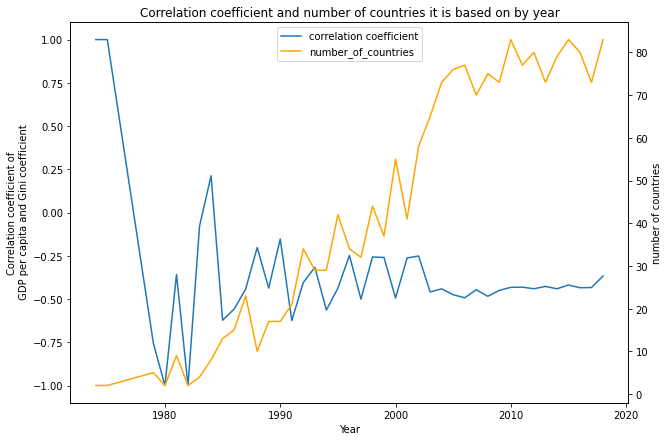

In [40]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(year_corr_coeff_val_count.index, year_corr_coeff_val_count.correlation_coefficient, label='correlation coefficient')
ax.set_ylabel('Correlation coefficient of\n GDP per capita and Gini coefficient')
ax.set_xlabel('Year')

ax2 = ax.twinx()
ax2.plot(year_corr_coeff_val_count.index, year_corr_coeff_val_count.number_of_countries, 'orange', label='number_of_countries')
ax2.set_ylabel('number of countries')

lines = ax.get_lines() + ax2.get_lines()

ax.legend(lines, [line.get_label() for line in lines], loc='upper center')
ax.set_title('Correlation coefficient and number of countries it is based on by year')

plt.show()

**Conclusie correlatie coefficient per jaar bekeken**

De correlatie coefficient  van 'GDP per capita' en de 'Gini coefficient' verschilt van jaar tot jaar, vooral in de jaren die wat verder in het verleden liggen. Dit komt waarschijnlijk omdat er dan van maar weinig landen data beschikbaar zijn. 

Als er van maar twee landen data beschikbaar zijn, dan is de correlatie coefficient altijd 1 of -1. Hoe meer landen data hebben geleverd hoe betrouwbaarder de correlatie coefficient kan worden berekend. Waarom de relatieve (negatieve) correlatie coefficient in 2018 iets kleiner uit valt dan in de jaren hiervoor kan niet verklaard worden doordat er bijvoorbeeld van minder landen data voorhanden zijn, want dat is niet het geval.

Als er data beschikbaar komt van meer landen in de loop der jaren, middelt de correlatie coefficient ongeveer naar een bepaald punt.

# Kijken naar correlatie coefficient per land

## Groupby countries


In [41]:
# Om een beter overzicht te krijgen over alle landen:
# m.b.v. groupby de correlatiecoeffiecient berekenen van alle landen over de jaren heen:
gdp_gini_groupby_country = gdp_gini_all.groupby('Entity')[['GDP per capita', 'Gini coefficient']].corr()

In [42]:
# gdp_gini_groupby_country

In [43]:
# Maak er eerst een niet multiindex dataframe van:
corr_coeff_per_country = gdp_gini_groupby_country.reset_index()

In [44]:
# corr_coeff_per_country

### Nu alle overbodige info verwijderen en mergen van twee dataframes

In [45]:
# Houdt alles waar in kolom 'level_1' staat 'Gini coefficient'
corr_coeff_per_country = corr_coeff_per_country.loc[(corr_coeff_per_country['level_1'] == 'Gini coefficient')]

In [46]:
# Drop column 'level_1' en column 'Gini coefficient'
corr_coeff_per_country = corr_coeff_per_country.drop(columns= ['level_1', 'Gini coefficient']).dropna()

In [47]:
# rename de kolom 'GDP per capita' naar 'correlation coefficient'
corr_coeff_per_country.columns = ['Entity', 'correlation_coefficient']

In [48]:
# Maak van de 'Entity' kolom de index
corr_coeff_per_country = corr_coeff_per_country.set_index('Entity')

In [49]:
# corr_coeff_per_country

In [50]:
# Aantal jaren waarvoor data aanwezig is per land:
# Value counts van de kolom 'Entity' nemen:
country_value_count = gdp_gini_all['Entity'].value_counts()

In [51]:
# Maak een dataframe van country_value_count
country_value_count = country_value_count.to_frame()

In [52]:
# Rename column 'Year' in 'number_of_years'
country_value_count.columns = ['number_of_years']

In [53]:
# country_value_count

In [54]:
# Mergen van 'corr_coeff_per_country' en 'country_value_count' 
country_corr_coeff_val_count = pd.merge(corr_coeff_per_country, country_value_count, left_index=True, right_index=True)

In [55]:
# country_corr_coeff_val_count

In [56]:
# Laten we kijken naar de Pearson correlatie coefficient van landen die 
# minimaal 15 jaar aan data hebben (Dit is een arbitrair getal, uit de losse pols genomen)
# Te weinig data kan leiden tot onduidelijke correlatie coefficient
country_corr_coeff_val_count_bigger_15 = country_corr_coeff_val_count.loc[country_corr_coeff_val_count['number_of_years'] >=15]

In [57]:
country_corr_coeff_val_count_bigger_15

,correlation_coefficient,number_of_years
Armenia,-0.583625,20
Austria,0.545864,21
Belarus,-0.502736,23
Belgium,0.412723,22
Bolivia,-0.935487,19
Brazil,-0.818107,34
Bulgaria,0.821464,20
Canada,-0.009400,18
China,0.681676,19
Colombia,-0.752986,20


**Conclusie landen waarvan in ieder geval over minimaal 15 jaar data beschikbaar is**

De berekende Pierson correlatie coefficient (van GDP en gini coefficient) van de verschillende landen, waarvan in ieder geval over minimaal 15 jaar data beschikbaar is verschilt nogal. De range loopt van bijna -1 tot bijna 1.

Er zijn landen waarbij de Pierson correlatie coefficient negatief is en dicht bij de -1 ligt, zoals Ecuador, Moldova, El Salvador, Bolivia, Thailand, Ierland. Dit betekent dat er een zeer sterke negatieve relatie is tussen de hoogte van het GDP en de gini coefficient (inkomens ongelijkheid). Over het algemeen geldt: Veel inkomensongelijkheid komt overeen met een laag GDP. Wordt de GDP hoger, dan wordt de inkomensongelijkheid kleiner (of andersom:)).

Er zijn landen waarbij de Pierson correlatie coefficient dicht bij nul ligt, zoals North Macedonia, Canada, Serbia en in iets mindere mate ook: Slovakia en Spain. Dit betekent dat er nauwelijks een relatie is tussen de hoogte van het GDP en de gini coefficient (inkomens ongelijkheid). 

Er zijn landen waarbij de Pierson correlatie coefficient dicht bij de 1 ligt, zoals, Finland, United States, Germany, Indonesia. Dit betekent dat er een zeer sterke positieve relatie is tussen de hoogte van het GDP en de gini coefficient (inkomens ongelijkheid).   Over het algemeen geldt: Veel inkomensongelijkheid komt overeen met een hoog GDP. Weinig inkomensongelijkheid komt overeen met een laag GDP.

> *Kanttekeningen:*

> Waar je eigenlijk ook naar zou moeten kijken is het verloop van de GDP en de gini coefficient in de tijd per land. Is dit heel globaal aan het steigen of dalen of is er een sterke steiging of daling? Als de relatieve verandering groot is, kan er (waarschijnlijk) meer waarde toegekend worden aan de Pearson correlatie coefficient...

> Ook is het van belang om te weten of de GDP juist omhoog gaat, of naar beneden in de loop van de tijd. Idem voor de gini-coefficient. Een waarde van de Pierson correlatie coefficient van bijvoorbeeld -0.5 kan op twee verschillende dingen duiden: Het GDP gaat in de loop van de tijd omhoog en de gini-coefficient daalt in de loop van de tijd of: Het GDP gaat in de loop van de tijd omlaag en de gini-coefficient stijgt in de loop van de tijd. In het eerste geval gaat het steeds beter met het land. In het tweede geval gaat het steeds slechter met een land.....(Er vanuit gaande dat het goed is als het GDP stijgt en de gini coefficient afneemt :))


### Duitsland

In [58]:
# Laten we eens naar Duitsland kijken
# Maak een grafiekje met de GDP, Gini coefficient over de jaren waarvan data zijn:
Germany = gdp_gini_all.loc[gdp_gini_all['Entity'] == 'Germany']

In [59]:
# Hernoem de kolommen:
Germany = Germany.rename(columns={'GDP per capita':'GDP_per_capita', 'Gini coefficient': 'Gini_coefficient'})

In [60]:
# Germany

In [61]:
Germany.columns


Index(['Entity', 'Code', 'Year', 'GDP_per_capita', 'Gini_coefficient'], dtype='object')

In [62]:
# De waarde van de correlatie coefficient van Duitsland wil ik in de titel van de grafiek printen
# Hiervoor eerst deze waarde in een variabele stoppen
# Van de df 'country_corr_coeff_val_count_bigger_15' of van 'corr_coeff_per_country'
Germany_corr_coeff = country_corr_coeff_val_count_bigger_15.loc['Germany', 'correlation_coefficient']

In [63]:
Germany_corr_coeff

0.8639346883658997

In [64]:
# afgerond op 3 cijfers achter de komma:
Germany_corr_coeff = round(Germany_corr_coeff,3)

In [65]:
Germany_corr_coeff

0.864

In [66]:
# Maak een string van de float om later te kunnen printen
Germany_corr_coeff_string = str(Germany_corr_coeff)

In [67]:
Germany_corr_coeff_string

'0.864'

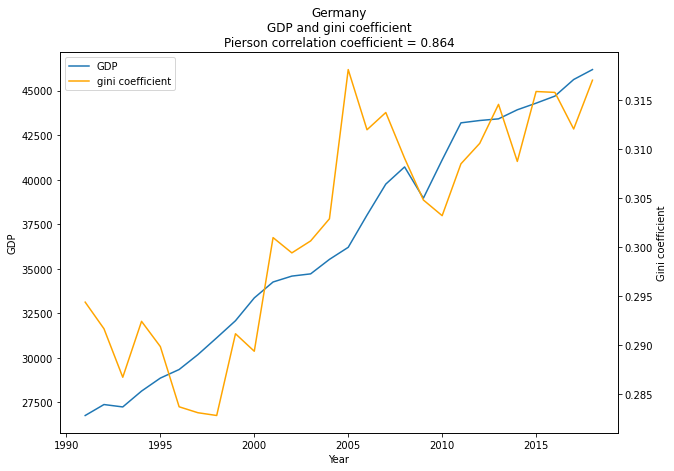

In [68]:
# Maak een grafiekje met op de x-as de jaren en op de twee y-assen 'GDP_per_capita' en 'Gini_coefficient':
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(Germany.Year, Germany.GDP_per_capita, label='GDP')
ax.set_ylabel('GDP')
ax.set_xlabel('Year')

ax2 = ax.twinx()
ax2.plot(Germany.Year, Germany.Gini_coefficient, 'orange', label='gini coefficient')
ax2.set_ylabel('Gini coefficient')

lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [line.get_label() for line in lines], loc='upper left')

ax.set_title("Germany\nGDP and gini coefficient\nPierson correlation coefficient = "+Germany_corr_coeff_string)

plt.show()

**Conclusie Duitsland**

In Duitsland gaat de gini coefficient van 1991 tm 2015 van 0.294 naar 0.316
Dit is een relatief hele kleine toename, maar omdat het GDP in die tijd ook omhoog gaat geeft de Pierson correlatie coefficient een getal dicht bij de 1 (0.86)

### Alle landen

Functie om van alle landen grafiekjes te plotten met info over  het verloop van de GDP en de gini coefficient over de jaren. Tevens is in de titel van de grafiek de bijbehorende Pierson correlatie coefficient te zien.

In [69]:
def get_country(country):
    country_df = gdp_gini_all.loc[gdp_gini_all['Entity'] == country]
    # Hernoem de kolommen:
    country_df = country_df.rename(columns={'GDP per capita':'GDP_per_capita', 'Gini coefficient': 'Gini_coefficient'})
    country_corr_coeff = country_corr_coeff_val_count_bigger_15.loc[country, 'correlation_coefficient']
    country_corr_coeff = round(country_corr_coeff,3)
    # print(country_corr_coeff)
    country_corr_coeff_string = str(country_corr_coeff)
    # print(country_corr_coeff)

    # Maak een grafiekje met op de x-as de jaren en op de twee y-assen 'GDP_per_capita' en 'Gini_coefficient':
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(country_df.Year, country_df.GDP_per_capita, label='GDP')
    ax.set_ylabel('GDP')
    ax.set_xlabel('Year')

    ax2 = ax.twinx()
    ax2.plot(country_df.Year, country_df.Gini_coefficient, 'orange', label='gini coefficient')
    ax2.set_ylabel('Gini coefficient')

    lines = ax.get_lines() + ax2.get_lines()
    ax.legend(lines, [line.get_label() for line in lines], loc='upper left')

    ax.set_title(f"{country}\nGDP and gini coefficient\nPierson correlation coefficient = "+country_corr_coeff_string)

    plt.show()

In [70]:
# Landen waarvan je een grafiekje zou kunnen maken:
gdp_gini_all.Entity.unique()

array(['Albania', 'Algeria', 'Angola', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Benin',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon',
       'Lesotho', 

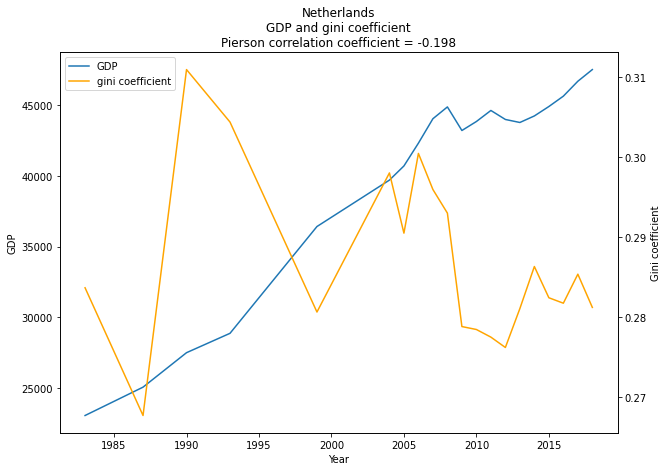

In [71]:
get_country("Netherlands")

In [72]:
# Nederland heeft weinig correlatie tussen het GDP en de gini coefficient
# De inkomensongelijkheid is in Nederland relatief klein (rond 2018 ongeveer 0.28)

In [73]:
# Bekijk nu de grafiekjes van de volgende landen, waarbij de Pierson 
# correlatie coefficient negatief is en dicht bij de -1 ligt:
# Ecuador, Moldova, El Salvador, Bolivia, Thailand, Ierland

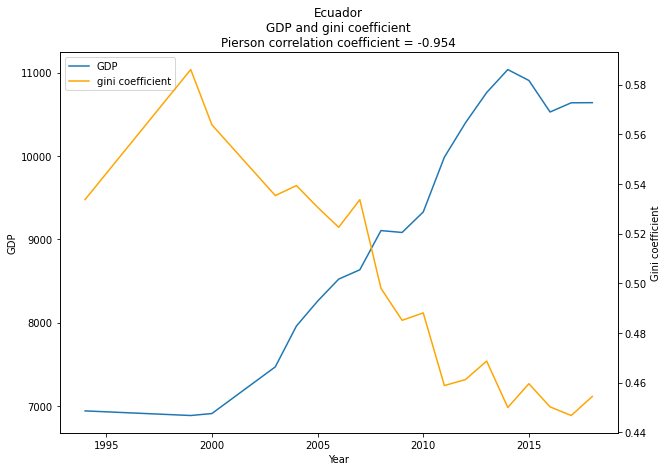

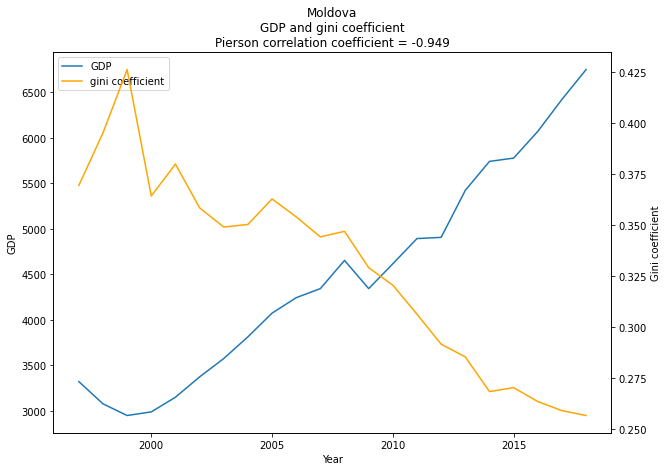

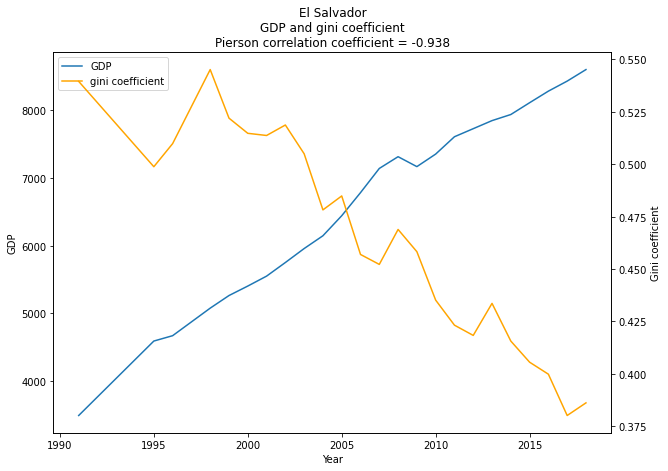

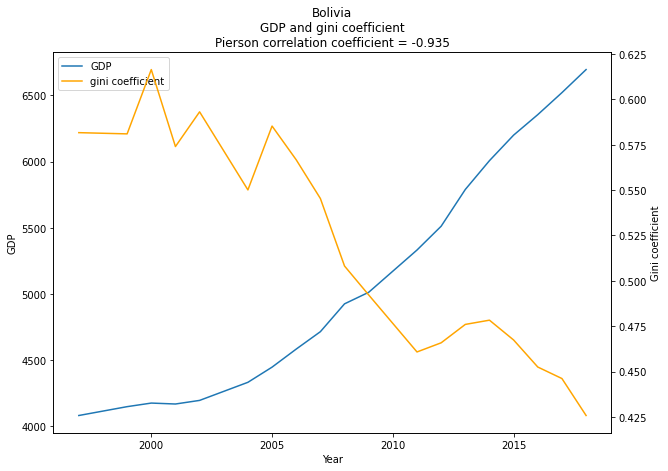

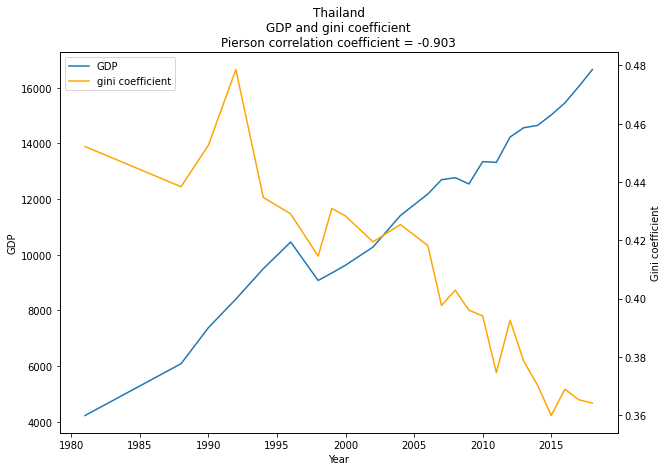

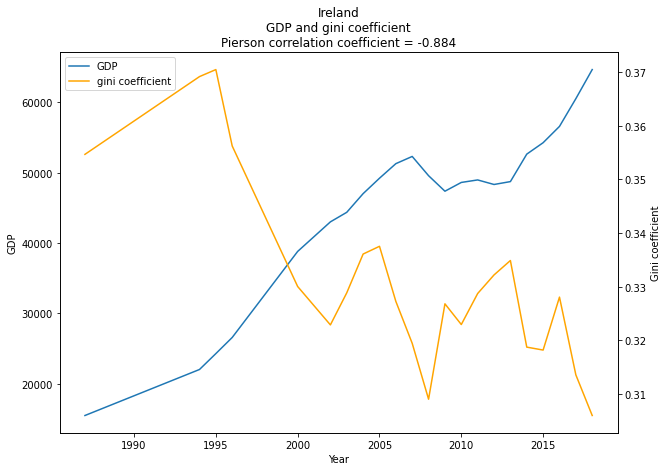

In [74]:
get_country("Ecuador")
get_country("Moldova")
get_country("El Salvador")
get_country("Bolivia")
get_country("Thailand")
get_country("Ireland")

**Conclusie landen waarbij de Pierson correlatie coefficient negatief is en dicht 
bij de -1 ligt:**

De landen waarbij de Pierson correlatie coefficient negatief is en dicht 
bij de -1 ligt, zoals Ecuador, Moldova, El Salvador, Bolivia, Thailand en Ierland zijn te zien in de bovenstaande grafiekjes.

Bij al deze landen gaat het GDP in de tijd flink omhoog en de gini coefficient flink naar beneden, wat betekent dat er steeds minder inkomensongelijkheid is in de loop van de tijd.

In **Ierland** is het GDP in 25 jaar tijd wel drie keer over de kop gegaan. De correlatiecoefficient is gedaald van 0.37 naar 0.31

**Moldavie** heeft de kleinste inkomensongelijkheid rond 2018 (gini coefficient 0.25).

De overige landen in volgorde van aflopende gini coefficient rond 2018:
**Equador** (gini coefficient rond 2018 0.45), **Bolivia** (gini coefficient rond 2018 0.43), **El Salvador** (gini coefficient rond 2018 0.38), **Thailand** (gini coefficient rond 2018 0.36)

In [75]:
# Bekijk nu de grafiekjes van de volgende landen, waarbij de Pierson 
# correlatie coefficient positief is en dicht bij de 1 ligt:
# Finland, United States, Germany, Indonesia

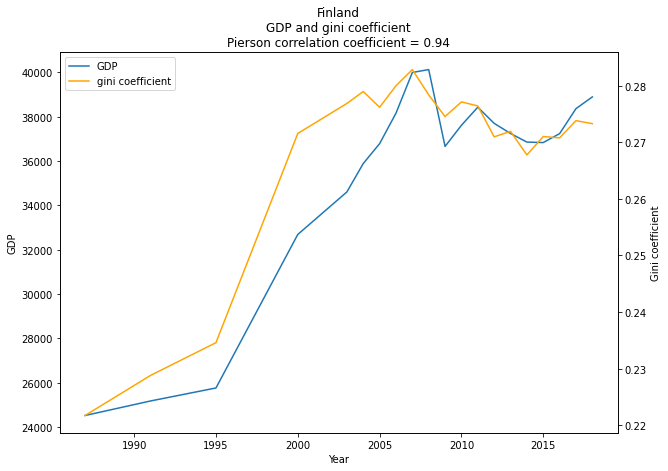

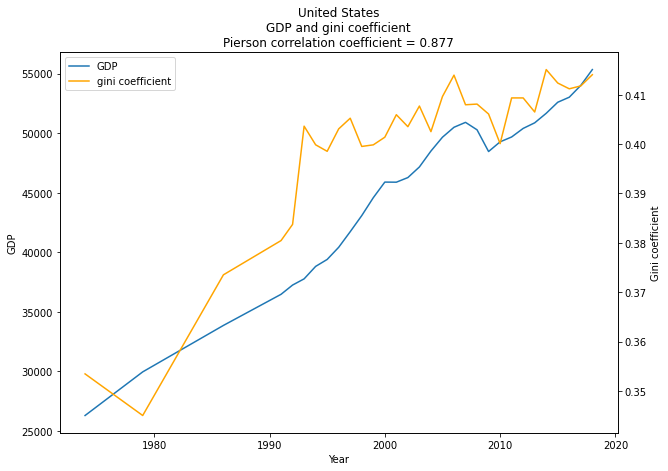

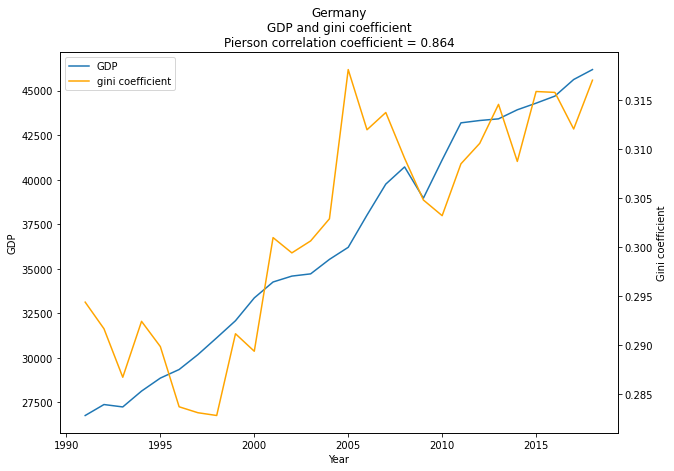

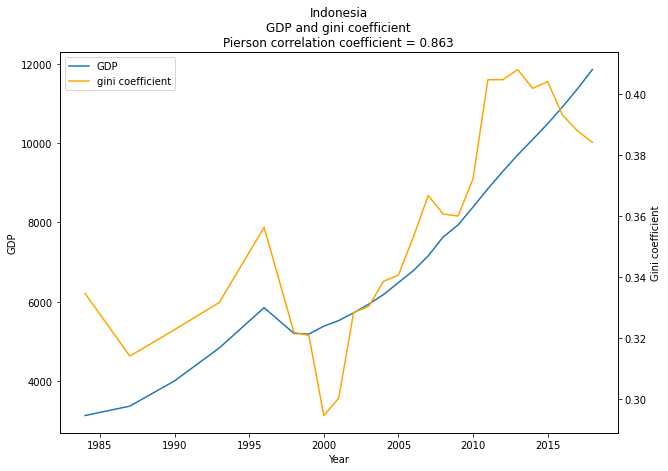

In [76]:
get_country("Finland")
get_country("United States")
get_country("Germany")
get_country("Indonesia")

**Conclusie landen waarbij de Pierson correlatie coefficient positief is en dicht 
bij de 1 ligt:**

De landen waarbij de Pierson correlatie coefficient positief is en dicht 
bij de 1 ligt, zoals Finland, United States, Germany, Indonesia zijn te zien in de bovenstaande grafiekjes.

Globaal gezien gaat bij de bovenstaande landen de GDP in de loop van de tijd omhoog. De gini coefficient gaat in de loop van de tijd ook omhoog. Bij deze landen stijgt de inkomensongelijkheid dus in de loop van de tijd. Er zijn wel wat nuances die hieronder worden besproken:

Na een oorspronkelijke stijging van de GDP en de gini coefficient in **Finland**, is er de afgelopen 20 jaar een redelijk evenwicht gekomen. De GDP en gini coefficient zijn niet echt veel veranderd. De inkomensongelijkheid is in die 20 jaar redelijk stabiel gebleven. Hierbij kan ook worden opgemerkt dat er relatief een kleine inkomensongelijkheid is in Finland (rond 2018 een gini coefficient van ongeveer 0.27).

Bij de **Verenigde Staten** zie je een sterke groei tot iets na 1990 en daarna een afvlakking van de groei van de gini coefficient. Er komt dus eigenlijk steeds meer inkomensongelijkheid in de Verenigde Staten, maar de inkomensongelijkheid stijgt nu minder dan dertig jaar geleden. De inkomensongelijkheid is in de Verenigde Staten relatief vrij groot (rond 2018 een gini coefficient van ongeveer 0.41).

**Duitsland** hebben we al besproken (zie hierboven).

**Indonesie** vertoonde tot ongeveer 2012 een stijging in de gini coefficient, daarna bleef hij redelijk stabiel en vanaf 2015 zie je zelfs een daling van de gini coefficient. Omdat dit nog vrij pril is, is nog niet helemaal duidelijk of deze trent door gaat zetten.

# **Overall conclusie:**

Er is als alle data worden bekeken een negatieve correlatie tussen het GDP en gini correlatie coefficient. De gini correlatie coefficient wordt hierbij als maat genomen voor de inkomensongelijkheid (Pierson correlatie coefficient = -0.432).

Globaal geldt: Als je de correlatie coefficient per jaar berekent: Hoe meer landen data hebben geleverd, hoe meer de Pierson correlatie coefficient naar de waarde gaat, die over alle data werd berekend.

Hoewel er dus over alle data samen een negatieve correlatie is tussen het GDP en de hoogte van de gini coefficient (inkomens ongelijkheid), is deze correlatie per land verschillend. Dit kan varieren van een bijna compleet negatieve correlatie tot een bijna compleet positieve correlatie. 